# Метрики в задаче классификации

Поработаем с [набором медицинских данных](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) об параметрах опухоли на рентгеновском снимке.
 1. Построим классификатор на основе логистической регрессии (класс [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html))
 2. Построим классификатор на основе метод k ближайших соседей (класс [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html))
 3. Сравним характеристики точности, полноты и F1 оценки для двх моделей (функция [precision_recall_fscore_support](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html))
 4. Построим для двух моделей PR-кривую и вычислите площадь по кривой (функция [precision_recall_curve](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html#sklearn.metrics.precision_recall_curve))
 5. Построим для двух моделей ROC-кривую и вычислите площадь под ней (функция [roc_curve](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve))

## Загрузка данных

In [16]:
from sklearn.datasets import load_breast_cancer
ds = load_breast_cancer()
print(ds['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [17]:
X = ds['data']
y = ds['target']
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [18]:
random_point = 4 #  For representation

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Dividing the total sample into training and test samples
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_point)
log_reg = LogisticRegression(max_iter=10000).fit(x_train, y_train)
y_predict = log_reg.predict(x_test)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10).fit(x_train, y_train)
y_predict = knn.predict(x_test)
y_predict

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [21]:
from sklearn.metrics import accuracy_score

log_reg_y_pred = log_reg.predict(x_test)
log_reg_acc = accuracy_score(y_test, log_reg_y_pred)

knn_y_pred = knn.predict(x_test)
knn_acc = accuracy_score(y_test, knn_y_pred)

print("LogReg accuracy = {:.4f}".format(log_reg_acc))
print("kNN accuracy = {:.4f}".format(knn_acc))

LogReg accuracy = 0.9298
kNN accuracy = 0.9064


Text(0, 0.5, 'True label')

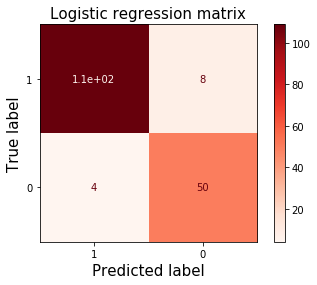

In [22]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
disp = plot_confusion_matrix(log_reg, x_test, y_test, cmap=plt.cm.Reds, labels=[1, 0])
disp.ax_.set_title('Logistic regression matrix', fontsize = 15)
disp.ax_.set_xlabel('Predicted label', fontsize = 15)
disp.ax_.set_ylabel('True label', fontsize = 15)

Text(0, 0.5, 'True label')

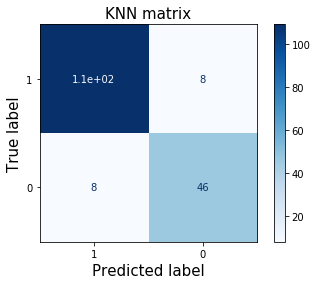

In [23]:
disp = plot_confusion_matrix(knn, x_test, y_test, cmap=plt.cm.Blues, labels=[1, 0])
disp.ax_.set_title('KNN matrix', fontsize = 15)
disp.ax_.set_xlabel('Predicted label', fontsize = 15)
disp.ax_.set_ylabel('True label', fontsize = 15)

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score

log_reg_precision = precision_score(y_test, log_reg_y_pred)
log_reg_recall = recall_score(y_test, log_reg_y_pred)
log_reg_f1 = f1_score(y_test, log_reg_y_pred)

knn_precision = precision_score(y_test, knn_y_pred)
knn_recall = recall_score(y_test, knn_y_pred)
knn_f1 = f1_score(y_test, knn_y_pred)

print("LogReg precision = {:.4f}".format(log_reg_precision))
print("LogReg recall = {:.4f}".format(log_reg_recall))
print("LogReg f1 = {:.4f}".format(log_reg_f1))
print("")
print("kNN precision = {:.4f}".format(knn_precision))
print("kNN recall = {:.4f}".format(knn_recall))
print("kNN f1 = {:.4f}".format(knn_f1))

LogReg precision = 0.9646
LogReg recall = 0.9316
LogReg f1 = 0.9478

kNN precision = 0.9316
kNN recall = 0.9316
kNN f1 = 0.9316


Видим, что модель логистической регрессии показывает себя лучше.

AP (logistic regression) = 1.00
AP (KNN) = 0.96


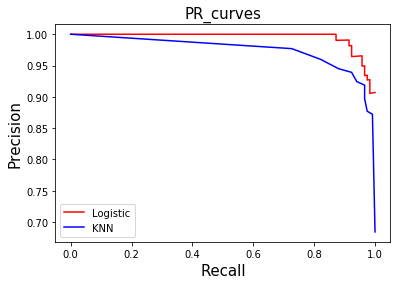

In [25]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

logreg_y_proba = log_reg.predict_proba(x_test)[:, 1]
knn_y_proba = knn.predict_proba(x_test)[:, 1]

precision_logreg, recall_logreg, thresholds_logreg = precision_recall_curve(y_test, logreg_y_proba)
precision_knn, recall_knn, thresholds_knn = precision_recall_curve(y_test, knn_y_proba)

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(recall_logreg, precision_logreg,  color = 'red', label = 'Logistic')
ax.plot(recall_knn, precision_knn, color = 'blue', label = 'KNN')
ax.set_xlabel('Recall', fontsize = 15)
ax.set_ylabel('Precision', fontsize = 15)
ax.set_title('PR_curves', fontsize = 15)
plt.legend()

print('AP (logistic regression) = %.2f' % average_precision_score(y_test, logreg_y_proba))
print('AP (KNN) = %.2f' % average_precision_score(y_test, knn_y_proba))

Text(0.5, 1.0, 'PR-curve logistic regression')

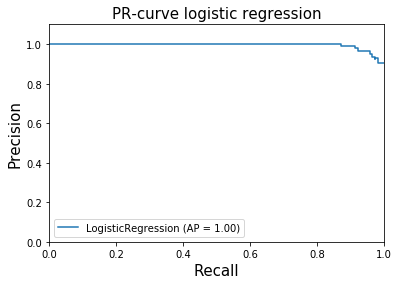

In [26]:
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(log_reg, x_test, y_test)
disp.ax_.set_ylim((0, 1.1))
disp.ax_.set_xlim((0, 1))
disp.ax_.set_xlabel('Recall', fontsize = 15)
disp.ax_.set_ylabel('Precision', fontsize = 15)
disp.ax_.set_title('PR-curve logistic regression', fontsize = 15)

Text(0.5, 1.0, 'PR-curve (KNN classifier)')

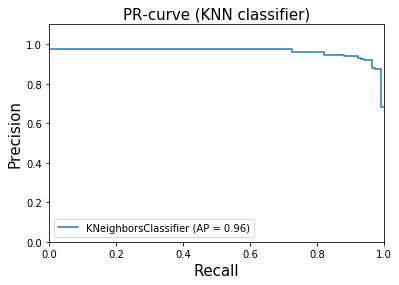

In [27]:
disp = plot_precision_recall_curve(knn, x_test, y_test)
disp.ax_.set_ylim((0, 1.1))
disp.ax_.set_xlim((0, 1))
disp.ax_.set_xlabel('Recall', fontsize = 15)
disp.ax_.set_ylabel('Precision', fontsize = 15)
disp.ax_.set_title('PR-curve (KNN classifier)', fontsize = 15)

AUC (logistic regression) = 0.99
AUC (KNN) = 0.95


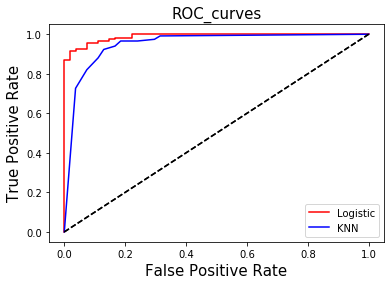

In [28]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr_rt_lm_logreg, tpr_rt_lm_logreg, _ = roc_curve(y_test, logreg_y_proba)
fpr_rt_lm_knn, tpr_rt_lm_knn, _ = roc_curve(y_test, knn_y_proba)
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(fpr_rt_lm_logreg, tpr_rt_lm_logreg, color = 'red', label = 'Logistic')
ax.plot(fpr_rt_lm_knn, tpr_rt_lm_knn, color = 'blue', label = 'KNN')
plt.plot([[0,0], [1, 1]], color = 'black', linestyle='--')
ax.set_xlabel('False Positive Rate', fontsize = 15)
ax.set_ylabel('True Positive Rate', fontsize = 15)
ax.set_title('ROC_curves', fontsize = 15)
plt.legend()
print('AUC (logistic regression) = %.2f' % roc_auc_score(y_test, logreg_y_proba))
print('AUC (KNN) = %.2f' % roc_auc_score(y_test, knn_y_proba))

AUC (logistic regression) = 0.99


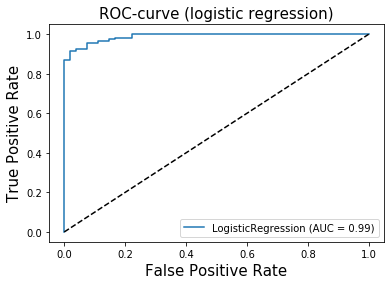

In [29]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(log_reg, x_test, y_test)
disp.ax_.plot([0, 1], [0, 1], 'k--');
disp.ax_.set_title('ROC-curve (logistic regression)', fontsize = 15)
disp.ax_.set_xlabel('False Positive Rate', fontsize = 15)
disp.ax_.set_ylabel('True Positive Rate', fontsize = 15)
print('AUC (logistic regression) = %.2f' % roc_auc_score(y_test, logreg_y_proba))

AUC (KNN) = 0.95


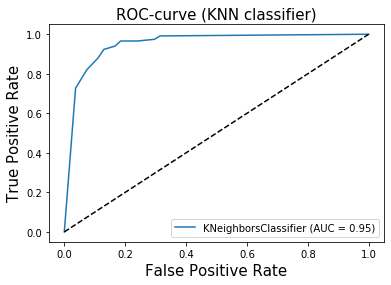

In [30]:
disp = plot_roc_curve(knn, x_test, y_test)
disp.ax_.plot([0, 1], [0, 1], 'k--')
knn_y_proba = knn.predict_proba(x_test)[:, 1]
disp.ax_.set_title('ROC-curve (KNN classifier)', fontsize = 15)
disp.ax_.set_xlabel('False Positive Rate', fontsize = 15)
disp.ax_.set_ylabel('True Positive Rate', fontsize = 15)
print('AUC (KNN) = %.2f' % roc_auc_score(y_test, knn_y_proba))

 # Вывод
 Таким образом, видим, что кривые (PR, ROC), получаемые с использованием метода логистической регрессии мажорируют кривые KNN. Это говорит о том, что для нашей задачи лучше подходит метод логистической регрессии. Этот вывод подтверждается  превосходством значений площадей под кривыми (AP и AUC), а также значений F-меры.
 
 Так как в нашей задаче мы можем считать метрику recall приоритетной, то для модели логистической регрессии возможно поставить порог, при котором значение recall будет равно 1, при этом значение precision будет равно примерно 0.9. В данном случае мы можем быть уверены, что классификатор не определяет свои предсказания одним наиболее встречающимся классом тестовой выборки. Чтобы в этом убедиться найдем значение precision, при котором все значения будут определяться к классу "1" (воспользуемся матрицей ошибок для логистической регрессии): <br> 
(110 + 8) / (110 + 8 + 50 + 4) = 0.686, это значение можно видеть у PR-кривой, соответсвующей методу KNN.